In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.dates as dates

In [2]:
def plot(data, date_col, ticker_col, stock_price_col, save_as=None):
    """Plot number of mentions in wsb and stock price over time."""

    ax = plt.figure(figsize=(17.5, 10)).add_subplot(111)

    plt.xticks(rotation=90)

    ax.set_ylabel("# of Mentions", fontsize=20, color="b")
    ax.tick_params(axis="y", which="major", labelsize=18)
    ax.bar(data[date_col], data[ticker_col], color="blue", alpha=0.4)

    ax2 = ax.twinx()
    ax2.plot(
        data[date_col],
        data[stock_price_col],
        marker="x",
        color="red",
        alpha=0.65,
        linewidth=2,
    )
    ax2.set_ylabel(f"{ticker_col} Stock Price", fontsize=20, color="r")
    ax2.tick_params(axis="y", which="major", labelsize=18)

    ax.xaxis.set_major_locator(dates.DayLocator(interval=2))  # every other day
    ax.xaxis.set_major_formatter(dates.DateFormatter("\n%d-%m-%Y"))

    plt.xlim([data[date_col].min(), data[date_col].max()])

    if isinstance(save_as, str):
        plt.savefig(save_as, dpi=300)

    plt.show()

In [3]:
# Load data
gme = pd.read_csv("data/GME_hourly_september.csv")
wsb = pd.read_csv("data/wsb_sep_01_feb_26.csv")

In [4]:
# Set date to pd.datetime format
gme["date_day"] = gme["date"].str.replace("T", " ")
gme["date_day"] = gme["date_day"].str.replace("Z", "")
gme["date_day"] = pd.to_datetime(gme["date_day"])
gme["date_day"] = gme["date_day"].dt.floor("D")

gme["date_hour"] = gme["date"].str.replace("T", " ")
gme["date_hour"] = gme["date_hour"].str.replace("Z", "")
gme["date_hour"] = pd.to_datetime(gme["date_hour"])

wsb["date"] = pd.to_datetime(wsb["date"])

# Create separate cols
wsb["date_hour"] = wsb["date"].dt.ceil("H")
wsb["date_day"] = wsb["date"].dt.floor("D")

In [5]:
# Add ticker to track whether post mentions stock
wsb["GME"] = np.where(wsb["title"].str.contains("GME|Gamestop", case=False), 1, 0)
wsb_GME = wsb[wsb["GME"] == 1]

In [6]:
wsb_daily = pd.DataFrame(wsb_GME.groupby("date_day")["GME"].sum())
wsb_daily.reset_index(level=0, inplace=True)

wsb_hourly = pd.DataFrame(wsb_GME.groupby("date_hour")["GME"].sum())
wsb_hourly.reset_index(level=0, inplace=True)

df_hourly = pd.merge(wsb_hourly, gme, how="inner", on="date_hour")
df_daily = pd.merge(wsb_daily, gme, how="inner", on="date_day")

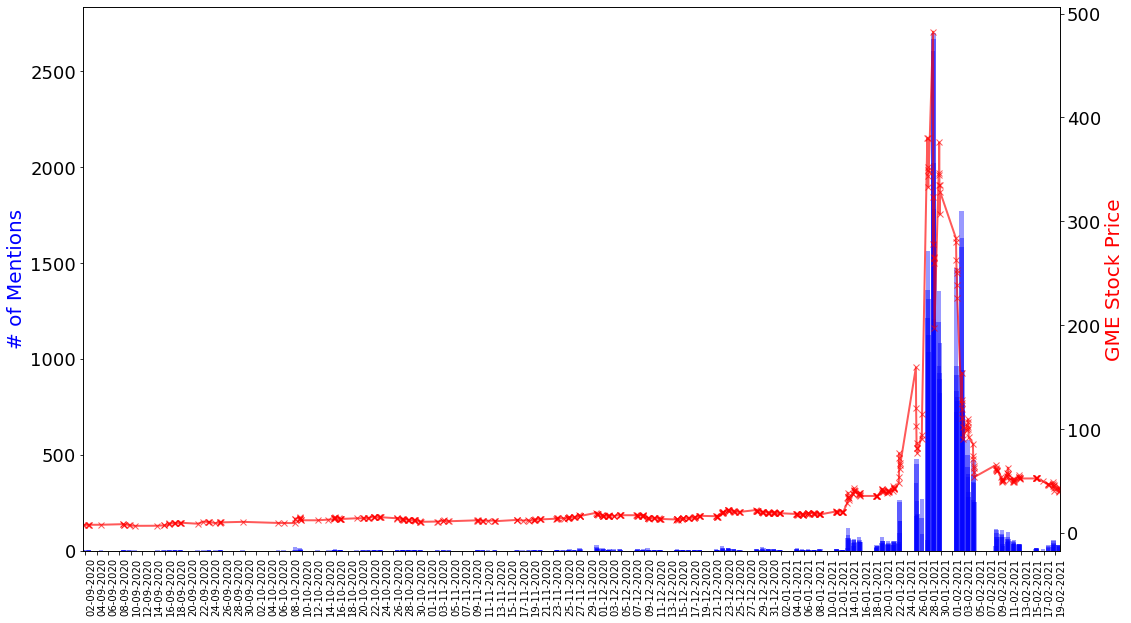

In [7]:
plot(
    df_hourly,
    date_col="date_hour",
    ticker_col="GME",
    stock_price_col="high",
    save_as="plots/correlation_gme_stock_price.png",
)